# Google Trend Analyis

In [2]:
# !pip install pytrends

In [85]:
import pandas as pd
from pytrends.request import TrendReq

In [86]:
pytrend = TrendReq(retries=5)

In [103]:
pytrend.build_payload(kw_list=['Football'])
df = pytrend.interest_by_region()
df

,Football
geoName,
Afghanistan,0
Albania,17
Algeria,11
American Samoa,0
Andorra,0
...,...
Western Sahara,0
Yemen,0
Zambia,0


In [104]:
df_indexed = df.reset_index()
df_indexed

,geoName,Football
0,Afghanistan,0
1,Albania,17
2,Algeria,11
3,American Samoa,0
4,Andorra,0
...,...,...
245,Western Sahara,0
246,Yemen,0
247,Zambia,0
248,Zimbabwe,0


In [105]:
df_sorted = df_indexed.sort_values('Football',ascending=False)
df_sorted

,geoName,Football
236,United Kingdom,100
37,Cameroon,70
71,Ethiopia,70
84,Ghana,50
17,Bangladesh,47
...,...,...
103,Indonesia,0
104,Iran,0
105,Iraq,0
106,Ireland,0


In [94]:
# df_sorted.to_csv('Football.csv')

In [108]:
df_sorted.head(20).plot(figuresize(20,8))

NameError: name 'figuresize' is not defined

## Daily Search Trend

In [116]:
# Hot searches
df = pytrend.trending_searches(pn="canada")
df

,0
0,Tottenham vs West Ham
1,The Flash
2,Diablo 4 patch notes
3,Gigi Hadid
4,Mystery object Australian beach
5,2024 Hyundai Santa Fe
6,Charles Barkley
7,Saquon Barkley
8,Les Cowboys Fringants
9,FIFA Women's World Cup 2023


## Today's Searches

In [120]:
df = pytrend.today_searches(pn='GB')
df

0     /trends/explore?q=Tottenham+vs+West+Ham&date=n...
1     /trends/explore?q=Jonny+Evans&date=now+7-d&geo=GB
2     /trends/explore?q=Sofia+Vergara&date=now+7-d&g...
3     /trends/explore?q=FIFA+Women's+World+Cup+2023&...
4      /trends/explore?q=Ryan+Giggs&date=now+7-d&geo=GB
5     /trends/explore?q=Lindsay+Lohan&date=now+7-d&g...
6        /trends/explore?q=Al+Nassr&date=now+7-d&geo=GB
7      /trends/explore?q=TNT+Sports&date=now+7-d&geo=GB
8        /trends/explore?q=Rita+Ora&date=now+7-d&geo=GB
9       /trends/explore?q=Anne+Reid&date=now+7-d&geo=GB
10       /trends/explore?q=Portland&date=now+7-d&geo=GB
11    /trends/explore?q=Coleen+Nolan&date=now+7-d&ge...
12     /trends/explore?q=Gigi+Hadid&date=now+7-d&geo=GB
13    /trends/explore?q=Nigel+Farage&date=now+7-d&ge...
14    /trends/explore?q=Melanie+Sykes&date=now+7-d&g...
15    /trends/explore?q=Commonwealth+Games&date=now+...
16    /trends/explore?q=Bayern+Munich&date=now+7-d&g...
17      /trends/explore?q=Donanemab&date=now+7-d

## Top Charts

In [124]:
pytrend.top_charts(2022, geo='GLOBAL')

,title,exploreQuery
0,Wordle,
1,India vs England,
2,Ukraine,
3,Queen Elizabeth,
4,Ind vs SA,
5,World Cup,
6,India vs West Indies,
7,iPhone 14,
8,Jeffrey Dahmer,
9,Indian Premier League,


In [145]:
pytrend.top_charts(2022, geo='IN')

,title,exploreQuery
0,Indian Premier League,ipl 2022
1,CoWIN,
2,FIFA World Cup,fifa world cup 2022
3,Asia Cup,
4,ICC T20 World Cup,t20 world cup 2022
5,Brahmastra: Part One – Shiva,brahmastra
6,e-SHRAM Card,e shram card
7,Commonwealth Games,commonwealth games 2022
8,K.G.F: Chapter 2,kgf 2
9,Indian Super League,isl


## Google Keyword suggestions

In [149]:
keywords = pytrend.suggestions(keyword='Mercedes')
df = pd.DataFrame(keywords)
df

,mid,title,type
0,/m/0h5wpdf,Mercedes-Benz,Car make
1,/m/024y62,Mercedes-Benz C-Class,Luxury car
2,/g/11bc71v0fr,Mercedes Benz,Topic
3,/m/052mx,Mercedes-Benz,Luxury vehicles company
4,/m/03fgc9,Mercedes-Benz GLE,Luxury


In [151]:
keywords = pytrend.suggestions(keyword='Artificial Intelligence')
df = pd.DataFrame(keywords)
df

,mid,title,type
0,/m/0mkz,Artificial intelligence,Topic
1,/g/11fl0y17rl,Artificial intelligence art,Topic
2,/m/011xg5,A.I. Artificial Intelligence,2001 film
3,/m/02m1n7,Ablation,Topic
4,/m/0cp6c,AIBO,Product lining


## Related Queries

In [152]:
pytrend.build_payload(kw_list=['AI'])

In [153]:
pytrend.related_queries()

{'AI': {'top':                          query  value
  0                 character ai    100
  1                 ai generator     50
  2                    google ai     38
  3                      chat ai     34
  4                      open ai     33
  5                     ai image     27
  6                       ai art     25
  7                   what is ai     23
  8                       gpt ai     21
  9                      chatgpt     18
  10                  ai chatgpt     18
  11                 chat ai gpt     15
  12                    chat gpt     15
  13                    voice ai     15
  14                  ai meaning     15
  15          image generator ai     13
  16     artificial intelligence     11
  17  ai artificial intelligence     11
  18                ai marketing     11
  19            ai art generator     11
  20                  midjourney     11
  21               midjourney ai     10
  22                     logo ai     10
  23                    ai 

In [ ]:
######

## Generate df from Car data

In [156]:
# Search items
brands = ['BMW','Mercedes','Ford','Toyota','Honda']

# Build payload with parameters
pytrend.build_payload(kw_list=brands,
                     timeframe='today 12-m',
                     geo='CA')

In [157]:
df_ca = pytrend.interest_by_region()
df_ca

,BMW,Mercedes,Ford,Toyota,Honda
geoName,,,,,
Alberta,10,6,37,24,23
British Columbia,13,8,30,26,23
Manitoba,7,5,38,23,27
New Brunswick,5,3,35,26,31
Newfoundland and Labrador,5,3,33,23,36
Northwest Territories,3,3,58,18,18
Nova Scotia,7,4,32,24,33
Nunavut,4,4,50,18,24
Ontario,13,8,30,22,27


<AxesSubplot: xlabel='geoName'>

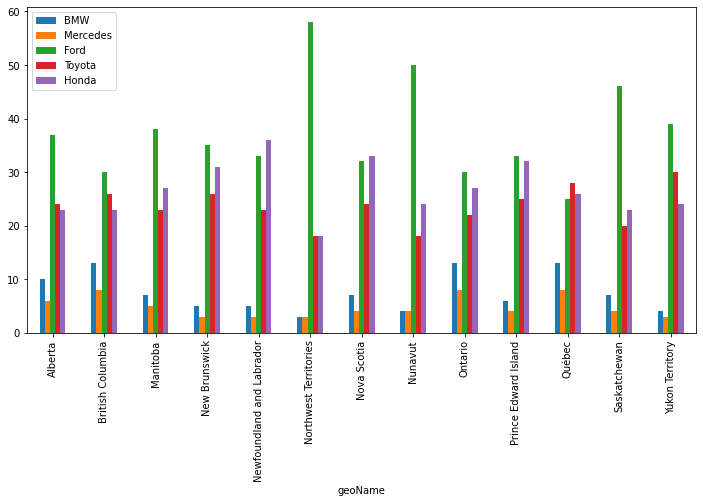

In [158]:
df_ca.plot(figsize=(12,6),y=brands,kind='bar')

In [163]:
# Search items US
brands = ['BMW','Mercedes','Ford','Toyota','Honda']

# Build payload with parameters
pytrend.build_payload(kw_list=brands,
                     timeframe='2023-01-01 2023-06-30',
                     geo='US')

In [164]:
df_us = pytrend.interest_by_region()
df_us

,BMW,Mercedes,Ford,Toyota,Honda
geoName,,,,,
Alabama,7,7,37,26,23
Alaska,7,4,42,25,22
Arizona,11,7,34,26,22
Arkansas,6,4,42,24,24
California,15,9,24,28,24
Colorado,11,6,37,26,20
Connecticut,15,8,30,22,25
Delaware,12,7,36,19,26
District of Columbia,15,10,30,24,21


<AxesSubplot: xlabel='geoName'>

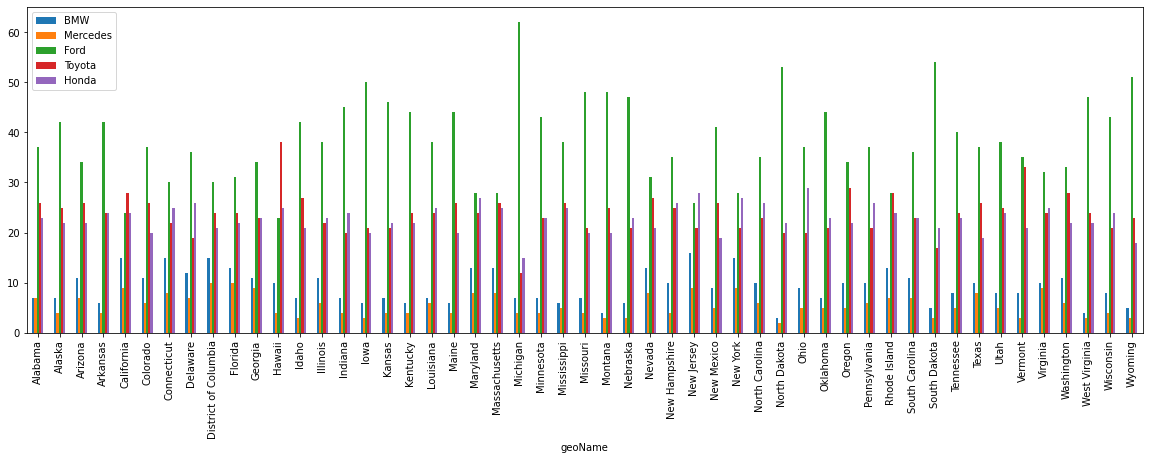

In [165]:
df_us.plot(figsize=(20,6),y=brands,kind='bar')

In [166]:
# Search items US
players = ['Messi','Ronaldo','Mbappe','Zlatan','Neymar']

# Build payload with parameters
pytrend.build_payload(kw_list=players,
                     timeframe='2022-01-01 2022-12-31',
                     geo='US')

In [168]:
df_us_players = pytrend.interest_by_region()
df_us_players

,Messi,Ronaldo,Mbappe,Zlatan,Neymar
geoName,,,,,
Alabama,32,45,9,2,12
Alaska,38,40,10,2,10
Arizona,35,42,10,1,12
Arkansas,34,42,10,1,13
California,36,40,12,1,11
Colorado,40,39,11,1,9
Connecticut,36,40,11,1,12
Delaware,36,38,13,1,12
District of Columbia,35,35,17,1,12


<AxesSubplot: xlabel='geoName'>

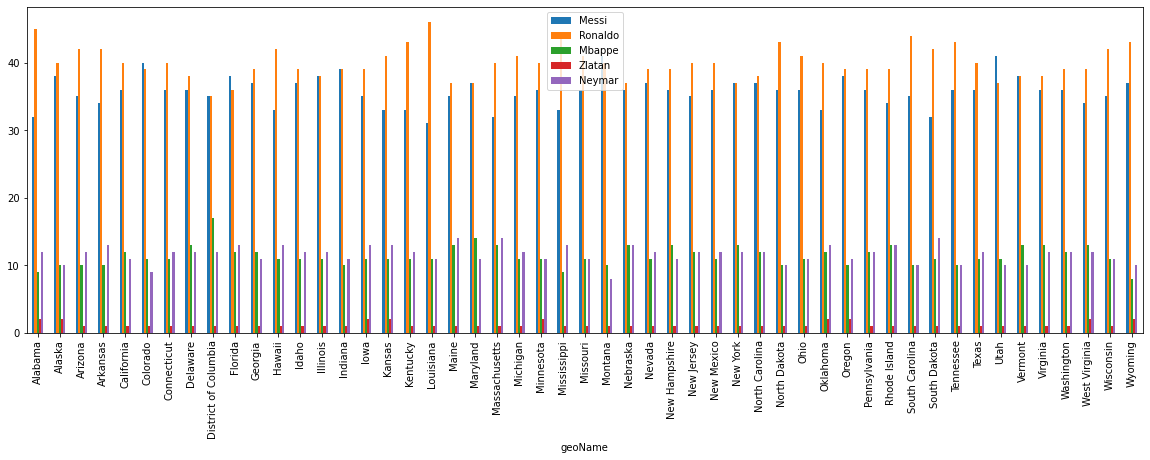

In [170]:
df_us_players.plot(figsize=(20,6),y=players,kind='bar')

In [176]:
# Search items US
products = ['Apple','Iphone 14','Samsung','S22']

# Build payload with parameters
pytrend.build_payload(kw_list=products,
                     timeframe='2022-01-01 2022-12-31',
                     geo='US')

In [177]:
df_us_products = pytrend.interest_by_region()
df_us_products

,Apple,Iphone 14,Samsung,S22
geoName,,,,
Alabama,66,5,26,3
Alaska,63,5,28,4
Arizona,64,5,28,3
Arkansas,64,5,28,3
California,69,6,23,2
Colorado,68,5,24,3
Connecticut,72,5,21,2
Delaware,69,5,24,2
District of Columbia,77,5,17,1


<AxesSubplot: xlabel='geoName'>

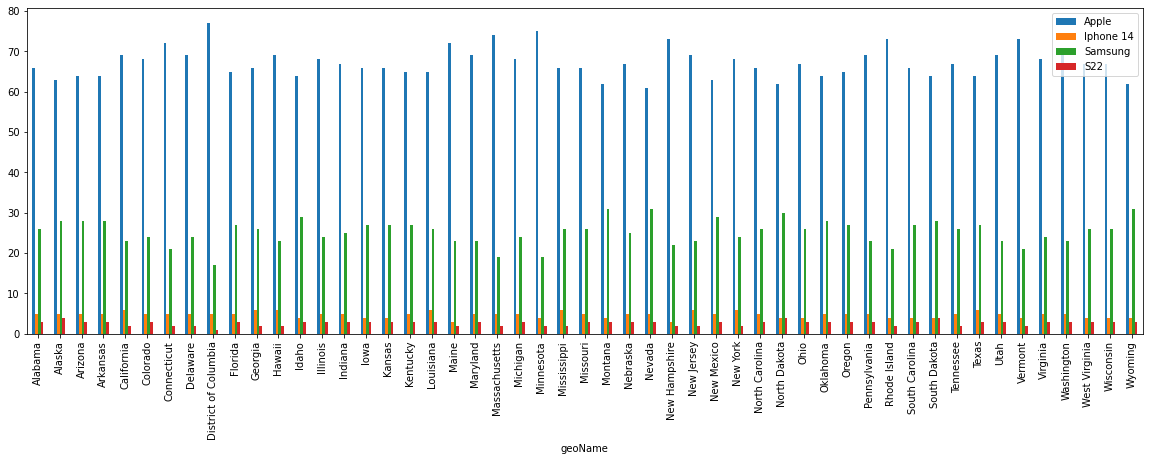

In [178]:
df_us_products.plot(figsize=(20,6),y=products,kind='bar')

In [179]:
pytrend.related_queries()

{'Apple': {'top':                  query  value
  0               iphone    100
  1          apple cider     58
  2   apple watch series     42
  3                 ipad     41
  4        apple near me     38
  5        apple watch 7     25
  6         apple valley     25
  7        apple macbook     24
  8             apple 14     16
  9     apple watch band     16
  10       apple account     16
  11           apple car     15
  12          apple plus     15
  13     apple iphone 13     14
  14        apple wallet     14
  15          apple cash     13
  16         apple crisp     12
  17              icloud     12
  18        apple icloud     12
  19   apple macbook pro     10
  20         macbook pro     10
  21      apple keyboard     10
  22          apple jobs      9
  23  apple phone number      9
  24          apple bank      9,
  'rising':                  query   value
  0               iphone  554700
  1          apple cider  322700
  2                 ipad  226650
  3      